# Where Should Renewable Energy Go Next?

May 5, 2017

Written by Katharine Pittman

Contact: klp398@nyu.edu

## Overview

Since 2011, the advocation and utilization of renewable energy has gained exponential momentum as the effect of climate change and global warming has become increasingly acknowledged. However, state legislation is the primary factor as to where renewable energy is implemented. Large energy companies that provide renewable energy options, such as SunPower and NRG, only provide these services in certain states. At the moment these states include: CA, CO, GA, MA, MD, MN, NJ, NM, PA, RI, and VT. These states will be referred to as the "Key 11 States" throughout this project.

The object of this project is to investigate which states should be targeted next based on various avenues.

In [543]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 

%matplotlib inline

# check versions
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version: 3.6.0 |Anaconda custom (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas version:  0.19.2
Today:  2017-05-04


## Selecting and Accessing Data Set #1

One of my main priorities for selecting a data set was that it contained all of the information I needed for that particular part of my project, and I wouldn't have to "piece together" different files to create a graph.

The U.S. Energy Information Administration (https://www.eia.gov/) has an innumerable amount of data, some files more detailed, while others are more holistic in nature. 

For the first part of my project, I am looking at the electricity prices for each state in 2015 for the Residential sector. From this I will identify the Top 5 Most Expensive States in terms of electricity prices that are **NOT** part of the Key 11 States, and then look at the average price of electricity per state from 2000 to 2015 for these Top 5 States.



In [544]:
url = 'https://www.eia.gov/electricity/data/state/avgprice_annual.xlsx' # importing the data
price = pd.read_excel(url)        
price.head() # looking at the beginning of the data

,"Average Price (Cents/kilowatthour) by State by Provider, 1990-2015",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total
1,2015,AK,Total Electric Industry,19.83,17.44,14.53,0,NaN,17.59
2,2015,AL,Total Electric Industry,11.7,10.83,6.03,0,NaN,9.33
3,2015,AR,Total Electric Industry,9.82,8.32,6.23,11.21,NaN,8.19
4,2015,AZ,Total Electric Industry,12.13,10.39,6.26,9.4,NaN,10.34


In [545]:
price.tail() # looking at the end of the data

,"Average Price (Cents/kilowatthour) by State by Provider, 1990-2015",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
3766,1990,WA,Full-Service Providers,4.39,4.15,2.39,NaN,3.13,3.4
3767,1990,WI,Full-Service Providers,6.63,5.78,3.99,NaN,6.47,5.37
3768,1990,WV,Full-Service Providers,5.9,5.36,3.56,NaN,8.19,4.73
3769,1990,WY,Full-Service Providers,5.97,5.17,3.47,NaN,7.9,4.21
3770,1990,US,Full-Service Providers,7.83,7.34,4.74,NaN,6.4,6.57


## Cleaning Up Data Set #1


After looking at the head of the data, I don't need the first row and I only need the first four columns, since I am only interested in prices for Residential. After looking at the tail of the data, I don't need any of the data prior to 2000, since I am focusing on 2000-2015.

After looking at the data from the url in full, I also am only interested in the Full-Service Provider prices for each state, so I will pull only this data from the dataset.

In [546]:
url = 'https://www.eia.gov/electricity/data/state/avgprice_annual.xlsx' # importing our data
price = pd.read_excel(url, 
                      skiprows=1, # skipping the first row
                      usecols=range(4), # only interested in the first four columns
                      skipfooter=1126) # skipping data for years 1990-1999

sector = ['Full-Service Providers'] # specifying what sector I want
price.isin(sector)
cleaned_price = price[price['Industry Sector Category'].isin(sector)]
print(cleaned_price)

      Year State Industry Sector Category  Residential
52    2015    AK   Full-Service Providers        19.83
53    2015    AL   Full-Service Providers        11.70
54    2015    AR   Full-Service Providers         9.82
55    2015    AZ   Full-Service Providers        12.13
56    2015    CA   Full-Service Providers        16.97
57    2015    CO   Full-Service Providers        12.12
58    2015    CT   Full-Service Providers        20.38
59    2015    DC   Full-Service Providers        12.30
60    2015    DE   Full-Service Providers        13.29
61    2015    FL   Full-Service Providers        11.58
62    2015    GA   Full-Service Providers        11.54
63    2015    HI   Full-Service Providers        29.60
64    2015    IA   Full-Service Providers        11.63
65    2015    ID   Full-Service Providers         9.93
66    2015    IL   Full-Service Providers        12.55
67    2015    IN   Full-Service Providers        11.57
68    2015    KS   Full-Service Providers        12.34
69    2015

In [547]:
# Inspecting the cleaned up data

print('Dimensions: ', cleaned_price.shape, '\n')  
print('Column labels: ', cleaned_price.columns, '\n')
print('Row labels: ', cleaned_price.index, '\n')
print('Type: ', cleaned_price.dtypes, '\n') # '\n' adds a blank line and makes the output easier to read

Dimensions:  (832, 4) 

Column labels:  Index(['Year', 'State', 'Industry Sector Category', 'Residential'], dtype='object') 

Row labels:  Int64Index([  52,   53,   54,   55,   56,   57,   58,   59,   60,   61,
            ...
            2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591],
           dtype='int64', length=832) 

Type:  Year                          int64
State                        object
Industry Sector Category     object
Residential                 float64
dtype: object 



### Price of Electricity for Each State in 2015

The five states with the highest electricity prices as of 2015 - that are not part of the Key 11 States - are HI, CT, AK, NH, and NY.

In [548]:
year = [2015] # specifying the year I want
cleaned_price.isin(year)
price2015 = cleaned_price[cleaned_price['Year'].isin(year)]
price2015_sorted = price2015.sort_values('Residential') # sorts the prices in ascending order
print(price2015_sorted)

     Year State Industry Sector Category  Residential
99   2015    WA   Full-Service Providers         9.09
70   2015    LA   Full-Service Providers         9.33
80   2015    ND   Full-Service Providers         9.62
54   2015    AR   Full-Service Providers         9.82
65   2015    ID   Full-Service Providers         9.93
101  2015    WV   Full-Service Providers        10.08
88   2015    OK   Full-Service Providers        10.14
69   2015    KY   Full-Service Providers        10.24
94   2015    TN   Full-Service Providers        10.30
81   2015    NE   Full-Service Providers        10.60
89   2015    OR   Full-Service Providers        10.66
78   2015    MT   Full-Service Providers        10.88
96   2015    UT   Full-Service Providers        10.88
102  2015    WY   Full-Service Providers        10.97
93   2015    SD   Full-Service Providers        11.08
76   2015    MO   Full-Service Providers        11.21
77   2015    MS   Full-Service Providers        11.27
79   2015    NC   Full-Servi

### Price of Electricity from 2000-2015 for HI, CT, AK, NH, and NY

In [549]:
# Showing the prices of electricity from 2000-2015 for just one state as a reference

state = ['HI'] # specifying what state I want
cleaned_price.isin(state)
HI_price = cleaned_price[cleaned_price['State'].isin(state)].iloc[::-1] # reverses the order 
                                                                        # of the rows
print(HI_price) # showing how the data looks

      Year State Industry Sector Category  Residential
2551  2000    HI   Full-Service Providers        16.41
2387  2001    HI   Full-Service Providers        16.34
2226  2002    HI   Full-Service Providers        15.63
2065  2003    HI   Full-Service Providers        16.73
1897  2004    HI   Full-Service Providers        18.06
1730  2005    HI   Full-Service Providers        20.70
1563  2006    HI   Full-Service Providers        23.35
1396  2007    HI   Full-Service Providers        24.12
1226  2008    HI   Full-Service Providers        32.50
1056  2009    HI   Full-Service Providers        24.20
889   2010    HI   Full-Service Providers        28.10
725   2011    HI   Full-Service Providers        34.68
561   2012    HI   Full-Service Providers        37.34
397   2013    HI   Full-Service Providers        36.98
230   2014    HI   Full-Service Providers        37.04
63    2015    HI   Full-Service Providers        29.60


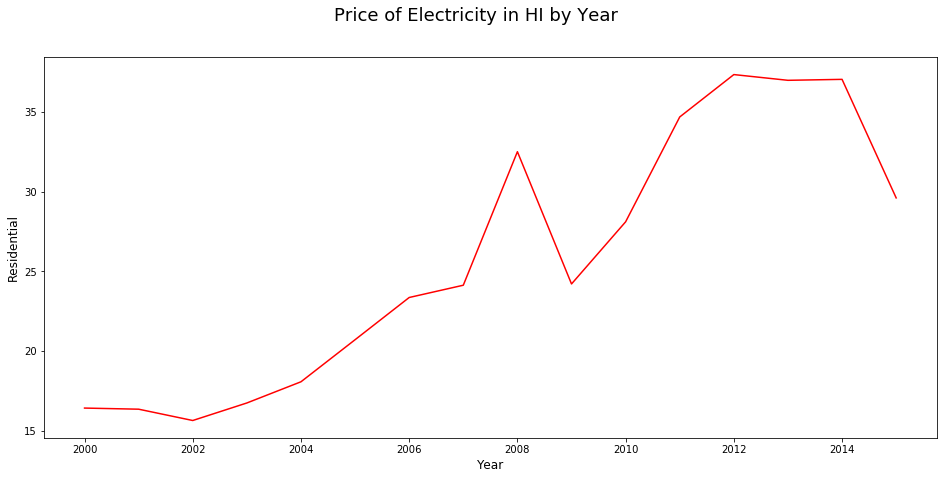

In [550]:
# Showing a graph for just one state as a reference

plt.figure(figsize = (16,7))
plt.plot(HI_price['Year'], HI_price['Residential'], color = 'red')
plt.suptitle('Price of Electricity in HI by Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Residential', fontsize=12)


In [551]:
# Pulling the price by year data for the additional four states I'm interested in 

state = ['CT'] # specifying what state I want
cleaned_price.isin(state)
CT_price = cleaned_price[cleaned_price['State'].isin(state)].iloc[::-1] # reverses the order

state = ['AK'] # specifying what state I want
cleaned_price.isin(state)
AK_price = cleaned_price[cleaned_price['State'].isin(state)].iloc[::-1] # reverses the order

state = ['NH'] # specifying what state I want
cleaned_price.isin(state)
NH_price = cleaned_price[cleaned_price['State'].isin(state)].iloc[::-1] # reverses the order

state = ['NY'] # specifying what state I want
cleaned_price.isin(state)
NY_price = cleaned_price[cleaned_price['State'].isin(state)].iloc[::-1] # reverses the order

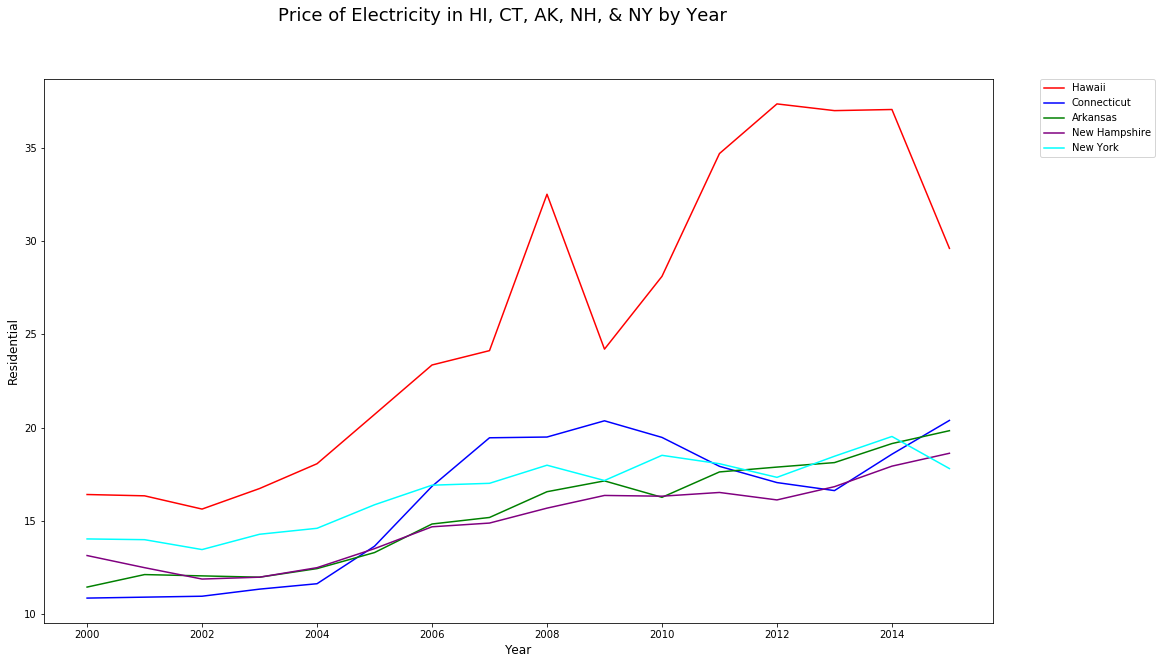

In [552]:
# Plotting a line graph with data from all five states I'm interested in

plt.figure(figsize = (17,10))

plt.plot(HI_price['Year'], HI_price['Residential'], color = 'red', label = "Hawaii")
plt.plot(CT_price['Year'], CT_price['Residential'], color = 'blue', label = "Connecticut")
plt.plot(AK_price['Year'], AK_price['Residential'], color = 'green', label = "Arkansas")
plt.plot(NH_price['Year'], NH_price['Residential'], color = 'purple', label = "New Hampshire")
plt.plot(NY_price['Year'], NY_price['Residential'], color = 'cyan', label = "New York")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.suptitle('Price of Electricity in HI, CT, AK, NH, & NY by Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Residential', fontsize=12)

plt.show()

## Selecting and Accessing Data Set #2

Besides cost, another avenue to investigate which states should consider adopting renewable energy is coal consumption. Data Set #2 will be looking at the Consumption of Coal for Electricity Generation by State in 2014 and 2015 for All Sectors. The Top 5 Coal Consuming states will be identified and graphically represented.

In [553]:
url2 = 'https://www.eia.gov/electricity/annual/xls/epa_05_09.xlsx' # importing our data
coal_consumption = pd.read_excel(url2)        
coal_consumption.head() # looking at the beginning of the data

,"Table 5.9. Consumption of Coal for Electricity Generation by State by Sector,",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2015 and 2014 (Thousand Tons),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Electric Power Sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Census Division\nand State,All Sectors,NaN,NaN,Electric Utilities,NaN,Independent Power Producers,NaN,Commercial Sector,NaN,Industrial Sector,NaN
3,NaN,Year 2015,Year 2014,Percentage Change,Year 2015,Year 2014,Year 2015,Year 2014,Year 2015,Year 2014,Year 2015,Year 2014
4,New England,1795,2310,-0.22,406,544,1377,1753,0,0,12,13


In [554]:
coal_consumption.tail() # looking at the end of the data

,"Table 5.9. Consumption of Coal for Electricity Generation by State by Sector,",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
62,Pacific Noncontiguous,1209,1231,-0.018,292,230,858,936,44,44,15,20
63,Alaska,556,487,0.14,292,230,220,213,44,44,0,0
64,Hawaii,653,744,-0.12,0,0,638,724,0,0,15,20
65,U.S. Total,739594,853634,-0.13,539506,624235,195927,224568,163,202,3999,4629
66,Displayed values of zero may represent small v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning Up Data Set #2

Data Set #2 lists the amount of coal consumed (in thousand tons) for electricity generation for each state, however it also divides the states into regions and provides the region total of coal consumed. As I am only focusing on the indvidiual states (and D.C.), I will have to specify that I just want the data for these rows.

In [555]:
url2 = 'https://www.eia.gov/electricity/annual/xls/epa_05_09.xlsx' # importing our data
coal_consumption = pd.read_excel(url2,       
                                 skiprows=4,
                                 usecols=range(3),
                                 skipfooter=2)

coal_consumption.columns = ['State', '2015', '2014']  
print(coal_consumption)

                    State    2015    2014
0             New England    1795    2310
1             Connecticut     359     499
2                   Maine      22      19
3           Massachusetts    1009    1248
4           New Hampshire     406     544
5            Rhode Island       0       0
6                 Vermont       0       0
7         Middle Atlantic   32755   41408
8              New Jersey     753    1061
9                New York    1104    2221
10           Pennsylvania   30898   38127
11     East North Central  164983  190107
12               Illinois   44030   52198
13                Indiana   39116   48560
14               Michigan   29568   29530
15                   Ohio   30576   38486
16              Wisconsin   21692   21334
17     West North Central  125028  138064
18                   Iowa   17659   20549
19                 Kansas   15851   18199
20              Minnesota   14649   16800
21               Missouri   38277   42967
22               Nebraska   14862 

In [556]:
# Inspecting the cleaned up data

print('Dimensions: ', coal_consumption.shape, '\n') 
print('Column labels: ', coal_consumption.columns, '\n')
print('Row labels: ', coal_consumption.index, '\n')
print('Type: ', coal_consumption.dtypes, '\n') # '\n' adds a blank line and makes the output easier to read

Dimensions:  (61, 3) 

Column labels:  Index(['State', '2015', '2014'], dtype='object') 

Row labels:  RangeIndex(start=0, stop=61, step=1) 

Type:  State    object
2015      int64
2014      int64
dtype: object 



### Coal Consumption 

The five states with the highest coal comsumtipn in 2015 - that are not part of the Key 11 States - are TX, IL, IN, MO, and KY.

In [557]:
# I don't want data for the different regions, so I'm specifying what rows I do want data for

state_list = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
              'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 
              'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 
              'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 
              'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
              'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
              'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 
              'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 
              'District of Columbia']

coal_consumption.isin(state_list)
state_coal_consumption = coal_consumption[coal_consumption['State'].isin(state_list)].sort_values('2015')
# sorts the values in ascending order, so I can pick out which states have the highest consumption 

print(state_coal_consumption)

                   State   2015    2014
5           Rhode Island      0       0
6                Vermont      0       0
27  District of Columbia      0       0
48                 Idaho     16      18
2                  Maine     22      19
55            California     67     290
26              Delaware    276     397
1            Connecticut    359     499
4          New Hampshire    406     544
59                Alaska    556     487
60                Hawaii    653     744
8             New Jersey    753    1061
24          South Dakota    990    1780
3          Massachusetts   1009    1248
9               New York   1104    2221
56                Oregon   1401    1853
50                Nevada   1507    3446
57            Washington   3414    4486
38           Mississippi   4830    6550
30              Maryland   6046    7451
33              Virginia   7587    9281
32        South Carolina   9238   11752
49               Montana  10283   10187
42             Louisiana  10755   12632


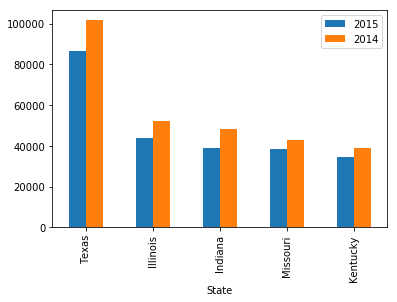

In [558]:
# Here I can use nlargest to graph the top 5 states, but this is only because one of the Key 11 States 
# is not included in the Top 5.

my_plot = state_coal_consumption.nlargest(5, '2015').plot(x = 'State', kind='bar')

## Selecting and Accessing Data Set #3

The final avenue I will take into addressing which states renewable energy should take over next may actually be the most important - emissions. This data set specifies the Carbon Dioxide, Sulfur Dioxide, and Nitrogen Oxides emitted from energy consumption at conventional power plants and combined-heat-and-power plants for 2014 and 2015. One must keep in mind that identified states from this section are likely similiar to states that consumed a vast amount of coal.



In [559]:
url3 = 'https://www.eia.gov/electricity/annual/xls/epa_09_05.xlsx' # importing our data
emissions = pd.read_excel(url3)        
emissions.head() # looking at the beginning of the data

,Table 9.5. Emissions from Energy Consumption at,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Conventional Power Plants and Combined-Heat-an...,NaN,NaN,NaN,NaN,NaN,NaN
1,"by State, 2014 and 2015 (Thousand Metric Tons)",NaN,NaN,NaN,NaN,NaN,NaN
2,Census Division\nand State,Carbon Dioxide (CO2),NaN,Sulfur Dioxide (SO2),NaN,Nitrogen Oxides (NOx),NaN
3,\n,Year 2015,Year 2014,Year 2015,Year 2014,Year 2015,Year 2014
4,New England,31965,30810,19,21,31,33


In [560]:
emissions.tail() # looking at the end of the data

,Table 9.5. Emissions from Energy Consumption at,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
62,Pacific Noncontiguous,11033,11006,23,20,37,32
63,Alaska,3676,3558,4,4,19,14
64,Hawaii,7356,7448,20,17,17,18
65,U.S. Total,2031452,2168284,2548,3454,1824,2100
66,Notes:\nThe emissions data presented include t...,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning Up Data Set #3

For Data Set #3 I will be looking at the 5 Highest Emitting States for each of the three categories (CO2, SO2, NOx) for Total emissions between 2014 and 2015.

In [561]:
url3 = 'https://www.eia.gov/electricity/annual/xls/epa_09_05.xlsx' # importing our data

emissions = pd.read_excel(url3,
                          skiprows=4,
                          skipfooter=2)

emissions.columns = ['State', 'CO2 2015', 'CO2 2014', 'SO2 2015', 'SO2 2014', 'NOx 2015', 'NOx 2014'] 
                                                                                        # renaming the columns

emissions['CO2 Total'] = emissions['CO2 2015'] + emissions['CO2 2014'] # adding CO2 emissions for 2014 + 2015
emissions['SO2 Total'] = emissions['SO2 2015'] + emissions['SO2 2014'] # adding SO2 emissions for 2014 + 2015
emissions['NOx Total'] = emissions['NOx 2015'] + emissions['NOx 2014'] # adding NOx emissions for 2014 + 2015

totals = ['State','CO2 Total', 'SO2 Total', 'NOx Total']
small_emissions = state_emissions[totals] # creating a new dataframe with just the total emissions

small_emissions = small_emissions.set_index(['State']) # setting the index to the State name
print(small_emissions) # checking to make sure it looks good

                      CO2 Total  SO2 Total  NOx Total
State                                                
District of Columbia         84       0.00       0.36
Rhode Island               5440       0.19       2.00
Vermont                      25       0.12       2.00
Delaware                   8367       2.00       5.00
New Hampshire              7111       5.00       7.00
South Dakota               5034      17.00      13.00
Connecticut               17501       3.00      15.00
Maine                      6359      21.00      16.00
Massachusetts             26339      11.00      24.00
Nevada                    30974      14.00      25.00
New Jersey                37791       6.00      26.00
Oregon                    17357      19.00      27.00
Washington                24070      24.00      29.00
Idaho                      3358       9.00      30.00
Alaska                     7234       8.00      33.00
Maryland                  39015      69.00      34.00
Hawaii                    14

In [562]:
# Inspecting the cleaned up data

print('Dimensions: ', small_emissions.shape, '\n') 
print('Column labels: ', small_emissions.columns, '\n')
print('Row labels: ', small_emissions.index, '\n')
print('Type: ', small_emissions.dtypes, '\n') # '\n' adds a blank line and makes the output easier to read

Dimensions:  (51, 3) 

Column labels:  Index(['CO2 Total', 'SO2 Total', 'NOx Total'], dtype='object') 

Row labels:  Index(['District of Columbia', 'Rhode Island', 'Vermont', 'Delaware',
       'New Hampshire', 'South Dakota', 'Connecticut', 'Maine',
       'Massachusetts', 'Nevada', 'New Jersey', 'Oregon', 'Washington',
       'Idaho', 'Alaska', 'Maryland', 'Hawaii', 'Mississippi', 'Montana',
       'South Carolina', 'Tennessee', 'Kansas', 'Nebraska', 'Minnesota',
       'Iowa', 'Oklahoma', 'Wisconsin', 'Virginia', 'Arkansas', 'New York',
       'Colorado', 'New Mexico', 'North Dakota', 'Wyoming', 'Arizona',
       'Illinois', 'Utah', 'Georgia', 'North Carolina', 'Alabama', 'Missouri',
       'West Virginia', 'Michigan', 'Louisiana', 'Kentucky', 'California',
       'Florida', 'Ohio', 'Indiana', 'Pennsylvania', 'Texas'],
      dtype='object', name='State') 

Type:  CO2 Total      int64
SO2 Total    float64
NOx Total    float64
dtype: object 



### CO2 Emissions

Below are the sorted values for CO2 Emissions. You can see that the 5 Highest Emitting States - not including any of the Key 11 States - are TX, FL, IN, OH, and IL.

In [563]:
print(small_emissions.sort_values('CO2 Total'))

                      CO2 Total  SO2 Total  NOx Total
State                                                
Vermont                      25       0.12       2.00
District of Columbia         84       0.00       0.36
Idaho                      3358       9.00      30.00
South Dakota               5034      17.00      13.00
Rhode Island               5440       0.19       2.00
Maine                      6359      21.00      16.00
New Hampshire              7111       5.00       7.00
Alaska                     7234       8.00      33.00
Delaware                   8367       2.00       5.00
Hawaii                    14804      37.00      35.00
Oregon                    17357      19.00      27.00
Connecticut               17501       3.00      15.00
Washington                24070      24.00      29.00
Massachusetts             26339      11.00      24.00
Nevada                    30974      14.00      25.00
Montana                   35814      26.00      38.00
New Jersey                37

### SO2 Emissions

Below are the sorted values for SO2 Emissions. You can see that the 5 Highest Emitting States - not including any of the Key 11 States - are TX, OH, IN, IL, and KY.

In [564]:
print(small_emissions.sort_values('SO2 Total'))

                      CO2 Total  SO2 Total  NOx Total
State                                                
District of Columbia         84       0.00       0.36
Vermont                      25       0.12       2.00
Rhode Island               5440       0.19       2.00
Delaware                   8367       2.00       5.00
Connecticut               17501       3.00      15.00
California               112988       4.00     147.00
New Hampshire              7111       5.00       7.00
New Jersey                37791       6.00      26.00
Alaska                     7234       8.00      33.00
Idaho                      3358       9.00      30.00
Massachusetts             26339      11.00      24.00
Nevada                    30974      14.00      25.00
South Dakota               5034      17.00      13.00
Oregon                    17357      19.00      27.00
Maine                      6359      21.00      16.00
New Mexico                49562      22.00      84.00
Washington                24

### NOx Emissions

Below are the sorted values for NOx Emissions. You can see that the 5 Highest Emitting States - not including any of the Key 11 States - are TX, IN, OH, FL, and KY.

In [565]:
print(small_emissions.sort_values('NOx Total'))

                      CO2 Total  SO2 Total  NOx Total
State                                                
District of Columbia         84       0.00       0.36
Rhode Island               5440       0.19       2.00
Vermont                      25       0.12       2.00
Delaware                   8367       2.00       5.00
New Hampshire              7111       5.00       7.00
South Dakota               5034      17.00      13.00
Connecticut               17501       3.00      15.00
Maine                      6359      21.00      16.00
Massachusetts             26339      11.00      24.00
Nevada                    30974      14.00      25.00
New Jersey                37791       6.00      26.00
Oregon                    17357      19.00      27.00
Washington                24070      24.00      29.00
Idaho                      3358       9.00      30.00
Alaska                     7234       8.00      33.00
Maryland                  39015      69.00      34.00
Hawaii                    14

## Emission Graphs

Because CO2 emission levels are tremednenously larger than SO2 or NOx levels it does not make sense to plot the three different emissions all on the same graph. Therefore, I will plot CO2 levels separately and then on a different graph plot SO2 and NOx together.

### CO2 Graph

State
Texas       497874.0
Florida     225009.0
Indiana     193681.0
Ohio        182372.0
Illinois    180899.0
Name: CO2 Total, dtype: float64


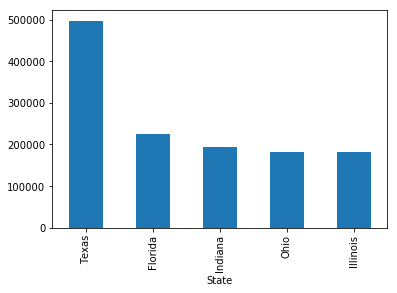

In [566]:
CO2_states = ['Texas', 'Florida','Indiana','Ohio','Illinois']
CO2_small = small_emissions.T[CO2_states] # creating a new dataframe with just the total emissions and
                                            # translating the dataframe so the State names will be in the Index
    
print(CO2_small.T['CO2 Total']) # only want to show the CO2 Totals because the SO2 and NOx are below

CO2_plot = CO2_small.T['CO2 Total'].plot(kind='bar') # translating it again so I can specify 
                                                        # that I only want 'CO2 Total' in the plot

### SO2 & NOx Graph

The 5 Highest Emitting States for SO2 and NOx have 4 overlapping states, so I will be plotting the **combined** highest 5 states, which makes a total of 6 states.

          SO2 Total  NOx Total
State                         
Texas         564.0      359.0
Indiana       427.0      212.0
Ohio          536.0      172.0
Florida       192.0      158.0
Kentucky      308.0      143.0
Illinois      309.0       95.0


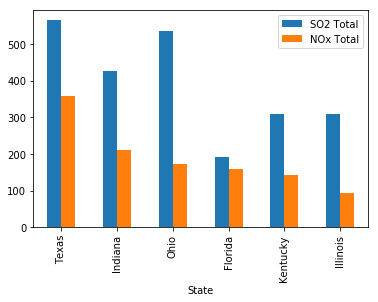

In [567]:
SO2_NOx_states = ['Texas','Indiana','Ohio','Florida','Kentucky','Illinois']
intermediate = small_emissions.T[SO2_NOx_states] # creating a new dataframe with just the total emissions and
                                                # translating the dataframe so the State names will be in the Index

SO2_NOx = ['SO2 Total', 'NOx Total'] # specifying that I just want these two columns for my new df, not CO2
final_SO2_NOx = intermediate.T[SO2_NOx] #creating a new dataframe with just the SO2 Total and NOx Total and
                                            # translating again so the SO2 Total and NOx Total will be in the Index
print(final_SO2_NOx)

final_SO2_NOx.plot(kind='bar')

## Conculsions

The three avenues I investigated to see which states renewable energy should expand to next included 1) Electricity Cost, 2) Coal Consumption, and 3) CO2, SO2, and NOx Emissions.

Not including the 11 Key States....
* The 5 Most Expensive States for Electricity are: HI, CT, AK, NH, and NY.
* The 5 Highest Coal Consuming States for Electricity are: TX, IN, MO, KY, and IL.
* The 5 Highest CO2 Emitting States are: TX, IN, OH, FL, and IL.
* The 5 Highest SO2 Emitting States are: TX, IN, OH, KY, and IL.
* The 5 Highest NOx Emitting States are: TX, IN, OH, KY, and FL.

                                           

Unfortunately, there was not a single state that appeared in all 5 categories. It seems the states with the highest consumptions and emissions have lower electricity prices.

Based on this data, the next states that I believe would have the most profound effect and should consider implementing renewable energy projects are Texas and Indiana.

